In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

### 1-1

In [2]:
df = pd.read_csv('ex2data1.csv')

In [3]:
#Normalize the feature
df['x'] = (df['x'] - df['x'].mean()) / df['x'].std()
# mean = df['x'].mean()
# std = df['x'].std()
#df['y'] = (df['y'] - df['y'].mean()) / df['y'].std()

In [4]:
df.insert(0, 'Ones', 1)

In [5]:
x0 = np.matrix(df.iloc[:,0:2])
y0 = np.matrix(df.iloc[:, 2:3])

In [6]:
#w = np.matrix(np.array([[0],[0]]))
m=y0.size
m

30

In [7]:
np.matrix(df.iloc[:,1:2].values).shape

(30, 1)

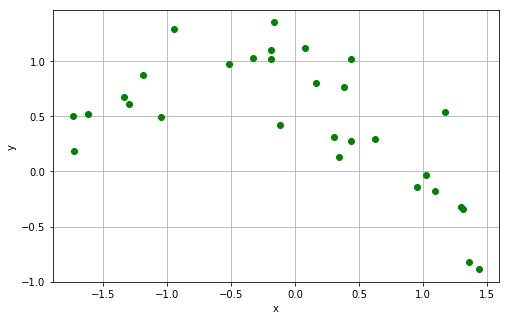

In [8]:
#x0.shape, y0.shape, w.shape
plt.figure(figsize=(8,5))
plt.ylabel('y')
plt.xlabel('x')
plt.plot(np.matrix(df.iloc[:,1:2].values),y0,'go')
plt.grid(True)

In [9]:

def h(w,x): #Linear hypothesis function
    return np.dot(x,w)

def cost_function(w,x,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(w,x)-y).T,(h(w,x)-y)))

In [10]:
initial_w = np.zeros((x0.shape[1],1))
cost_function(initial_w, x0, y0)

0.2690767102822047

In [11]:
#w.ravel().shape[0]

In [12]:
# def gradient_descent_matrix1(x, y, w, alpha, iterations):
#     temp = np.matrix(np.zeros(w.shape))
#     w_param = int(w.ravel().shape[0])
#     costs = np.zeros(iterations)
    
#     for i in range(iterations):
#         dist = (x * w) - y

#         for j in range(w_param):
#             #dist=(x[:,j] * w[j]) - y[]
#             deriv = np.multiply(dist, x[:,j].T)
#             temp[j] = w[j] - ((alpha / (float(len(x)))) * np.sum(deriv))
            
#         w = temp
#         costs[i] = cost_function_matrix(x, y, w)

#     return w, costs
x0.shape

(30, 2)

In [13]:
def descendGradient(X, y, init_w):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    w = init_w
    costs = [] #Used to plot cost as function of iteration
    w_history = [] #Used to visualize the minimization path later on
    for i in xrange(iterations):
        temp = w
        costs.append(cost_function(w,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        w_history.append(list(w[:,0]))
        error = (h(w, X) - y)
        #Simultaneously updating theta values
        for j in xrange(len(temp)):
            temp[j] = w[j] - (alpha/m)*np.sum((error)*np.array(X[:,j]).T)
        w = temp
    return w, w_history, costs

In [14]:
#w = [[0],[0]]
#w0, costs0 = gradient_descent_matrix1(x0, y0, w, 0.0000015, 30000)
iterations = 1500
alpha = 0.01
initial_w = np.zeros((x0.shape[1],1))
w, w_history, costs = descendGradient(x0, y0, initial_w)

In [15]:
matrix_w = np.matrix(w)
matrix_w

matrix([[  4.52691509e-01],
        [ -8.57832324e-17]])

In [16]:
cost = cost_function(w,x0,y0)

In [17]:
# f = w0[0] + (w0[1] * x)
# f
print 'RMSE %f' % np.sqrt(cost)

RMSE 0.408181


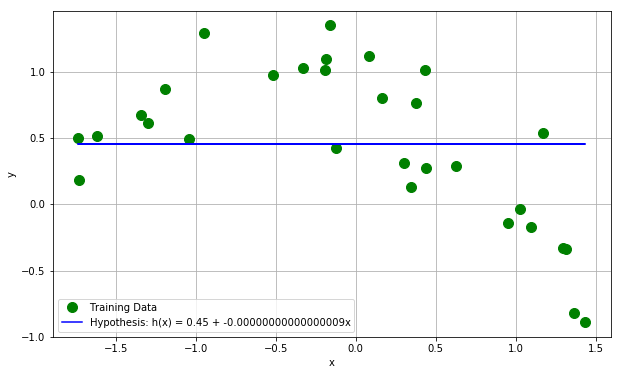

In [18]:
def fitted_line_function(xval):
    return matrix_w[0] + xval*matrix_w[1]
plt.figure(figsize=(10,6))
plt.plot(x0[:,1],y0[:,0],'go',markersize=10,label='Training Data')
plt.plot(x0[:,1],fitted_line_function(x0[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.17fx'%(matrix_w[0],matrix_w[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

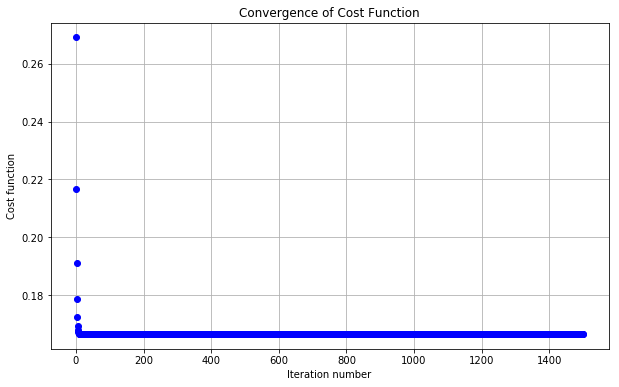

In [19]:
def plotConvergence(cost):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(cost)),cost,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(costs)
#dummy = plt.ylim([costs.min(),costs.max()])



### 1-2

In [20]:
x1 = df.iloc[:, 0:2].values
y1 = df.iloc[:,2:3].values
def genPolyFeatures(myX,p):
    """
    Function takes in the X matrix (with bias term already included as the first column)
    and returns an X matrix with "p" additional columns.
    The first additional column will be the 2nd column (first non-bias column) squared,
    the next additional column will be the 2nd column cubed, etc.
    """
    newX = myX.copy()
    for i in xrange(p):
        dim = i+2
        newX = np.insert(newX,newX.shape[1],np.power(newX[:,1],dim),axis=1)
    return newX

In [21]:
newX = genPolyFeatures(x1, 1)
#newX.shape

In [22]:
newX.shape

(30, 3)

In [23]:
x_squared = np.matrix(newX)
y_matrix = np.matrix(y1)

In [24]:
initial_w = np.zeros((x_squared.shape[1],1))
#w = np.matrix(np.array([[0],[0]]))
#initial_w = np.zeros((x0.shape[1],1))
iterations=2000
alpha=0.00001
w1, w_history1, costs1 = descendGradient(x_squared, y_matrix, initial_w)

In [25]:
matrix_w1 = np.matrix(w1)
matrix_w1

matrix([[  1.60729003e-01],
        [ -3.35953487e-18],
        [  1.55371369e-01]])

In [26]:
w1_flat = w1.flatten()

In [27]:
x_squared_df = pd.DataFrame(x_squared)
x_squared_df.sort_values(by=[1])

0         1         2
25  1.0 -1.736221  3.014464
2   1.0 -1.729095  2.989768
26  1.0 -1.618519  2.619605
16  1.0 -1.339582  1.794480
5   1.0 -1.300011  1.690028
15  1.0 -1.190301  1.416817
11  1.0 -1.043850  1.089623
0   1.0 -0.946877  0.896577
13  1.0 -0.516078  0.266337
27  1.0 -0.328708  0.108049
8   1.0 -0.192128  0.036913
29  1.0 -0.188804  0.035647
20  1.0 -0.162967  0.026558
14  1.0 -0.120587  0.014541
22  1.0  0.080919  0.006548
9   1.0  0.162964  0.026557
6   1.0  0.300009  0.090005
7   1.0  0.344094  0.118401
10  1.0  0.379404  0.143947
1   1.0  0.432845  0.187355
3   1.0  0.439107  0.192815
19  1.0  0.626597  0.392623
23  1.0  0.953177  0.908547
18  1.0  1.025331  1.051304
12  1.0  1.093173  1.195028
17  1.0  1.167660  1.363429
21  1.0  1.297557  1.683653
24  1.0  1.314656  1.728319
4   1.0  1.362117  1.855362
28  1.0  1.434119  2.056698

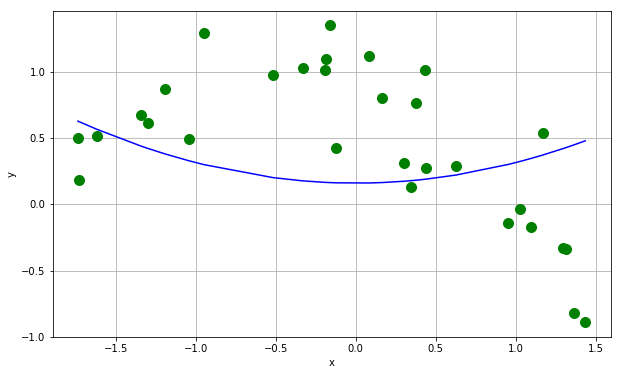

In [28]:

def fitted_line_function(xval):
    return matrix_w1[0] + xval[:,1]*matrix_w1[1] + xval[:,2] * matrix_w1[2]
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
xmat = np.ones((30,1))
xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = x_squared
#f = poly1d(h(matrix_w1,xmat))
plt.plot(df.iloc[:,1],df.iloc[:,2],'go',markersize=10,label='Training Data')
#x_squared = (x_squared - mean)/std
#_=plt.plot(xvals,np.dot(x_squared, matrix_w1),'b-')
plt.plot(df.iloc[:,1].sort_values(),h(matrix_w1, x_squared_df.sort_values(by=[1])),'b')
#_=plt.plot(df.iloc[:,1],np.poly1d(w1_flat)(df.iloc[:,1]),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('y')
plt.xlabel('x')
plt.show()

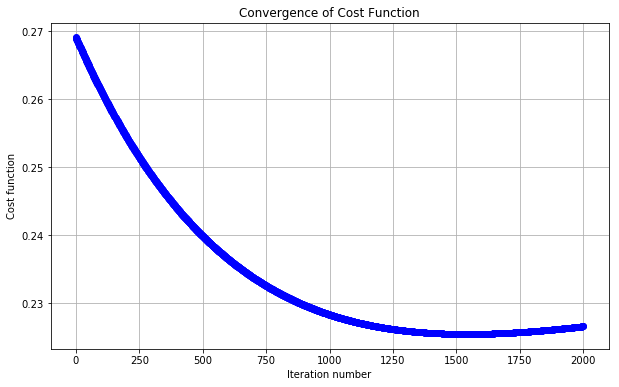

In [29]:
plotConvergence(costs1)

In [30]:
cost = cost_function(matrix_w1,x_squared,y1)

In [31]:
print 'RMSE: %f' %np.sqrt(cost)

RMSE: 0.475993


### 1-3

In [32]:
x2 = df.iloc[:, 0:2].values
y2 = df.iloc[:,2:3].values

In [33]:
newX2 = genPolyFeatures(x2, 3)

In [34]:
x_fourth = np.matrix(newX2)
matrix_y2 = np.matrix(y2)

In [35]:
x_fourth.shape

(30, 5)

In [36]:
initial_w = np.zeros((x_fourth.shape[1],1))
alpha=0.000001
w2, w_history2, costs2 = descendGradient(x_fourth, y_matrix, initial_w)

In [37]:
matrix_w2 = np.matrix(w2)

In [38]:
matrix_w2

matrix([[  2.33039095e-02],
        [ -4.90048742e-19],
        [  2.25271125e-02],
        [ -6.05508482e-03],
        [  4.19710800e-02]])

In [39]:
w2_flat = w2.flatten()

In [40]:
x_fourth_df = pd.DataFrame(x_fourth)

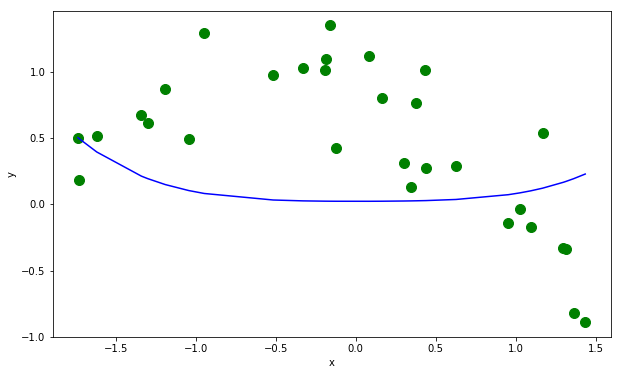

In [41]:
def fitted_line_function(xval):
    return matrix_w2[0] + xval[:,1]*matrix_w2[1] + xval[:,2] * matrix_w2[2] + xval[:,3] * matrix_w2[3] + xval[:,4] * matrix_w2[4]
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
# xmat = np.ones((30,1))
# xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
# xmat = x_squared
#xticks(arrange(10))
#fig, ax = plt.subplots()
#f = poly1d(h(matrix_w1,xmat))
plt.plot(df.iloc[:,1],df.iloc[:,2],'go',markersize=10,label='Training Data')

plt.plot(df.iloc[:,1].sort_values(ascending=False),h(matrix_w2, x_fourth_df.sort_values(by=[1], ascending=False)),'b')
#ax.grid(True) #Always plot.grid true!
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [42]:
print 'RMSE: %f' %np.sqrt(cost_function(matrix_w2, x_fourth, matrix_y2))
print 'Weights: '
print matrix_w2

RMSE: 0.504083
Weights: 
[[  2.33039095e-02]
 [ -4.90048742e-19]
 [  2.25271125e-02]
 [ -6.05508482e-03]
 [  4.19710800e-02]]


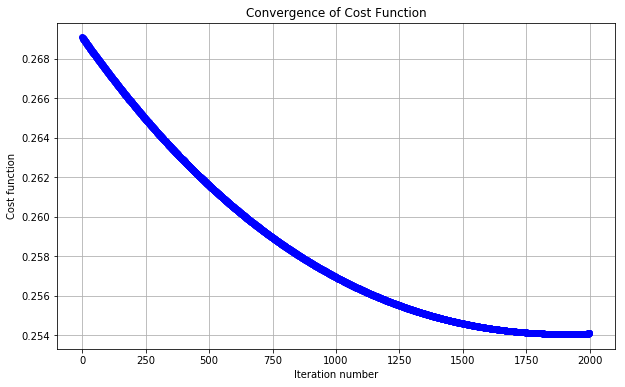

In [43]:
plotConvergence(costs2)

### 1-4

In [44]:
x3 = df.iloc[:, 0:2].values
y3 = df.iloc[:,2:3].values

In [45]:
newX3 = genPolyFeatures(x3, 15)

In [46]:
x_16th = np.matrix(newX3)
matrix_y3 = np.matrix(y3)
init_w3 = np.zeros((x_16th.shape[1],1))

In [47]:
#init_w3 = np.zeros((x_16th.shape[1],1))
iterations = 3000
alpha = 0.0000000001
w3, w_history3, costs3 = descendGradient(x_16th, matrix_y3, init_w3)

In [48]:
matrix_w3 = np.matrix(w3)
matrix_w3

matrix([[  1.03421828e-06],
        [ -2.36077824e-23],
        [  9.99744334e-07],
        [ -2.68722267e-07],
        [  1.86265991e-06],
        [ -1.05634610e-06],
        [  4.09663064e-06],
        [ -3.49480698e-06],
        [  9.93916577e-06],
        [ -1.09274551e-05],
        [  2.57926846e-05],
        [ -3.33037085e-05],
        [  7.00457807e-05],
        [ -1.00192048e-04],
        [  1.96044096e-04],
        [ -2.99380932e-04],
        [  5.59706191e-04]])

In [49]:
w3_flat = w3.flatten()
x_16th_df=pd.DataFrame(x_16th)

In [50]:
print 'RMSE %f' %np.sqrt(cost_function(matrix_w3, x_16th, matrix_y3))

RMSE 1.081607


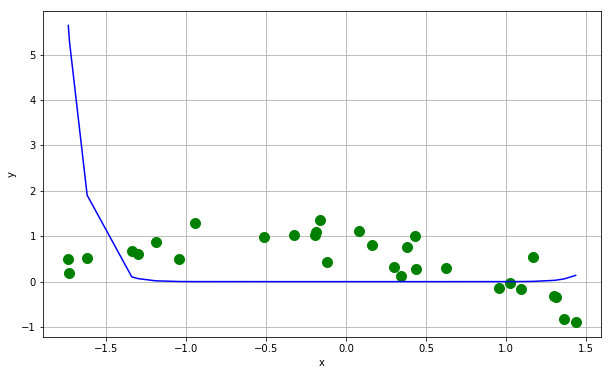

In [51]:
def fitted_line_function_16th(xval):
    return matrix_w2[0] + xval[:,1]*matrix_w2[1] + xval[:,2] * matrix_w2[2] + xval[:,3] * matrix_w2[3] + xval[:,4] * matrix_w2[4]
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
xmat = np.ones((30,1))
xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = x_squared
#f = poly1d(h(matrix_w1,xmat))
plt.plot(x3[:,1],y3[:,0],'go',markersize=10,label='Training Data')
# plt.plot(xvals,h(matrix_w1,xmat),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.17fx + %0.2fx^2'%(matrix_w1[0],matrix_w1[1], matrix_w1[2]))
plt.plot(df.iloc[:,1].sort_values(ascending=False),h(matrix_w3, x_16th_df.sort_values(by=[1], ascending=False)),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('y')
plt.xlabel('x')
plt.show()

### 1-5

In [52]:
x4 = df.iloc[:, 0:2].values
y4 = df.iloc[:,2:3].values
lambda_ops=[0.0001, 0.1,1.,10.]

In [53]:
def cost_function_reg(w, x, y, penalty):
    m = x.shape[0]
    y_hat = h(w, x).reshape((m,1))
    cost = float((1./(2*m)) * np.dot((y_hat - y).T,(y_hat - y)))
    regterm = (float(penalty)/(2 * m)) * float(w[1:].T.dot(w[1:]))
    return cost + regterm

In [54]:
init_w = np.array([[1.],[1.]])
for a in lambda_ops:
    print cost_function_reg(init_w, x4, y4, penalty=a)

1.12045649258
1.12212149258
1.13712149258
1.28712149258


In [55]:
def gradient_descent_reg(w,x,y,penalty):
    w = w.reshape((w.shape[0],1))
    m = x.shape[0]
    #grad has same shape as myTheta (2x1)
    y_hat = h(w,x).reshape((m,1))
    gradient = (1./float(m))*x.T.dot(h(w,x)-y)
    regterm = (float(penalty)/m)*w
    regterm[0] = 0
    regterm.reshape((gradient.shape[0],1))
    return gradient + regterm

In [56]:
penalty=[0.001, 0.1, 1, 10]
coefs = []

In [57]:
for l in penalty:
    w = np.zeros((x_16th.shape[1],1))
    matrix_w4 = np.matrix(gradient_descent_reg(w,x_16th,y4,l))
    coefs.append(matrix_w4)

In [68]:
coefs

[matrix([[  -0.45269151],
         [   0.32073629],
         [  -0.18370659],
         [   0.5844706 ],
         [  -0.31128346],
         [   1.21304344],
         [  -0.78617633],
         [   2.74814739],
         [  -2.25712373],
         [   6.67551722],
         [  -6.7318997 ],
         [  17.11577074],
         [ -20.22262068],
         [  45.71711494],
         [ -60.63546245],
         [ 125.8674372 ],
         [-181.17662521]]), matrix([[  -0.45269151],
         [   0.32073629],
         [  -0.18370659],
         [   0.5844706 ],
         [  -0.31128346],
         [   1.21304344],
         [  -0.78617633],
         [   2.74814739],
         [  -2.25712373],
         [   6.67551722],
         [  -6.7318997 ],
         [  17.11577074],
         [ -20.22262068],
         [  45.71711494],
         [ -60.63546245],
         [ 125.8674372 ],
         [-181.17662521]]), matrix([[  -0.45269151],
         [   0.32073629],
         [  -0.18370659],
         [   0.5844706 ],
         [

In [59]:
w_flatten = coefs[0].flatten()
#w_flatten.ndim

In [60]:
for i in range(len(penalty)):
    print 'RMSE %f' %np.sqrt(cost_function_reg(coefs[i], x_16th, y4, penalty[i]))

RMSE 356030.970531
RMSE 356030.970659
RMSE 356030.971823
RMSE 356030.983460


In [61]:
# plt.figure(figsize=(10,6))
# #f = poly1d(h(matrix_w1,xmat))
# plt.plot(x4[:,1],y4[:,0],'go',markersize=10,label='Training Data')
# # plt.plot(xvals,h(matrix_w1,xmat),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.17fx + %0.2fx^2'%(matrix_w1[0],matrix_w1[1], matrix_w1[2]))
# plt.plot(df.iloc[:,1].sort_values(ascending=False),np.poly1d(w_flatten)(df.iloc[:,1].sort_values(ascending=False)),'b-')
# plt.grid(True) #Always plot.grid true!
# plt.ylabel('y')
# plt.xlabel('x')
# plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
print 'RMSE: %f' % np.sqrt(cost_function_reg(coefs[0], x_16th, y4, penalty[0]))

RMSE: 356030.970531


### 1-6

In [63]:
lambda_ops = [0.1, 1, 10]
x5 = np.matrix(df.iloc[:, 1:2])
y5 = np.matrix(df.iloc[:,2:3])
matrix_y5 = np.matrix(y5)
from sklearn.linear_model import Ridge
coefs = []
for l in lambda_ops:
    r0 = Ridge(l)
    r0.fit(x_16th, matrix_y5)
    coefs.append(r0.coef_)
    print r0.coef_, np.sqrt(mean_squared_error(r0.predict(x_16th), matrix_y5))

[[ 0.         -0.62942525 -0.40700699 -0.29703092 -0.21112299 -0.00383183
  -0.02401486  0.30951462  0.14532136  0.39341955  0.19821634  0.07218475
   0.05610867 -0.46729628 -0.2519597   0.15170264  0.08160321]] 0.242224353929
[[ 0.         -0.46324487 -0.2093621  -0.10320866 -0.11239153  0.03385085
  -0.03562464  0.10684689  0.02685016  0.10144008  0.05826526  0.00234348
   0.02787275 -0.11919868 -0.0758387   0.03957139  0.02288291]] 0.264844362754
[[ 0.         -0.14818694 -0.0590945  -0.06713008 -0.04612943 -0.03682015
  -0.03502344 -0.01527754 -0.02337713 -0.00024674 -0.01061292  0.00478448
   0.00139831 -0.00069824  0.00613652 -0.00047525 -0.0017395 ]] 0.310340638813


In [64]:
# plt.figure(figsize=(10,6))
# xvals = np.linspace(df.x.min(), df.x.max(), 30)
# xmat = np.ones((30,1))
# xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
# xmat = x_squared
# #f = poly1d(h(matrix_w1,xmat))
# plt.plot(df.iloc[:,1],df.iloc[:,2],'go',markersize=10,label='Training Data')
# # plt.plot(xvals,h(matrix_w1,xmat),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.17fx + %0.2fx^2'%(matrix_w1[0],matrix_w1[1], matrix_w1[2]))
# plt.plot(df.iloc[:,1].sort_values(ascending=False),np.dot(x_16th_df.sort_values(by=[1],ascending=False), r.coef_.T),'b-')
# plt.grid(True) #Always plot.grid true!
# plt.ylabel('y')
# plt.xlabel('x')
# plt.show()

In [65]:
 coefs_array = np.asarray(coefs)
coefs_array.shape

(3, 1, 17)

In [66]:
lambda_ops_array = np.asarray(lambda_ops)
lambda_ops_array.shape

(3,)

In [67]:
# from sklearn.datasets import make_regression
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error

# clf = Ridge()

# #X, y, w = make_regression(n_samples=10, n_features=10, coef=True,random_state=1, bias=3.5)

# coefs = []
# errors = []

# alphas = np.logspace(-6, 6, 200)

# # Train the model with different regularisation strengths
# for a in alphas:
#     clf.set_params(alpha=a)
#     clf.fit(x_16th, y5)
#     coefs.append(clf.coef_)
#     #errors.append(mean_squared_error(h(clf.coef_.T, x_16th), y5))

# # Display results
# plt.figure(figsize=(20, 6))

# plt.subplot(121)
# ax = plt.gca()
# ax.plot(alphas, coefs)
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')

# plt.show()

In [68]:
# plt.figure(figsize=(20, 6))

# plt.subplot(121)
# ax = plt.gca()
# ax.plot(lambda_ops_array, coefs_array.flatten())
# ax.set_xscale('log')
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
# plt.show()

### 1-7

In [69]:
x5 = np.matrix(df.iloc[:, 1:2])
y5 = np.matrix(df.iloc[:,2:3])
matrix_y5 = np.matrix(y5)
from sklearn.linear_model import Lasso
alphas = [-1, 0.000005, 0.000025, 0.001, 0.01, 0.1, 1, 10]
coefs1 = []
for a in alphas:
    l0 = Lasso(a, max_iter=1500)
    l0.fit(x_16th, matrix_y5)
    coefs1.append(l0.coef_)
    print l0.coef_, np.sqrt(mean_squared_error(l0.predict(x_16th), matrix_y5))

[  0.00000000e+00  -3.72400821e+01  -2.60246574e+02   1.79031925e+01
   3.14280717e+02   7.17344851e+01  -8.37089671e+01  -4.57394117e+01
  -1.48104725e+01  -1.88596276e+00   7.82882584e-01   1.35289340e+00
   9.14347105e-01   5.63120607e-01   2.98594817e-01   1.73487305e-01
   8.48161927e-02] 17.9906127086
[  0.00000000e+00  -7.88555083e-01  -6.42281121e-01   3.80740691e-01
   2.63584024e-01   3.91665978e-02  -3.77584536e-03  -3.24675432e-02
  -2.14695100e-02  -1.44938232e-02  -8.03587402e-03  -3.64928673e-03
  -1.85426909e-03  -5.91883682e-04  -2.62984893e-04  -2.05080618e-05
   8.33744092e-06] 0.262742181378
[  0.00000000e+00  -7.87770504e-01  -6.37013490e-01   3.80125705e-01
   2.57149470e-01   3.80232623e-02  -1.96758351e-03  -3.16373403e-02
  -2.12198106e-02  -1.44713769e-02  -8.05397559e-03  -3.67195654e-03
  -1.87024395e-03  -6.02148234e-04  -2.68636711e-04  -2.38200502e-05
   6.69950741e-06] 0.262753776481
[  0.00000000e+00  -7.51515324e-01  -3.99611980e-01   3.46821466e-01
  

/Users/trininh/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [70]:
l1 = Lasso(0.000005)
l1.fit(x_16th, matrix_y5)
print 'Optimized weights' 
l1.coef_

Optimized weights


array([  0.00000000e+00,  -7.90490920e-01,  -6.23744823e-01,
         3.89735294e-01,   2.47703017e-01,   2.63833884e-02,
        -6.16252131e-03,  -2.91819019e-02,  -1.90545451e-02,
        -1.29838759e-02,  -7.21258624e-03,  -3.52641454e-03,
        -1.81431987e-03,  -7.12730698e-04,  -3.37754069e-04,
        -9.99350885e-05,  -3.74003525e-05])

In [71]:
print 'RMSE %f' %np.sqrt(mean_squared_error(l1.predict(x_16th), matrix_y5))

RMSE 0.262866


## Problem 2

In [70]:
df1 = pd.read_csv('ex2data2.csv')

In [71]:
df1.insert(0, 'Ones', 1)

In [72]:
from sklearn.model_selection import train_test_split
train_set0, test_set = train_test_split(df1, test_size = 0.2, random_state=1)

In [73]:
train_set1, validation_set = train_test_split(train_set0, test_size = 0.2, random_state=1)

In [74]:
x8 = np.matrix(validation_set.iloc[:,0:2])
y8 = np.matrix(validation_set.iloc[:,2:3])

In [75]:
x8_test = np.matrix(test_set.iloc[:,0:2])
y8_test = np.matrix(test_set.iloc[:,2:3])

In [76]:
#Train Set
#train_set1.insert(0, 'Ones', 1)

x7 = np.matrix(train_set1.iloc[:,0:2])
y7 = np.matrix(train_set1.iloc[:,2:3])

In [77]:
x7.shape, y7.shape

((3458, 2), (3458, 1))

<function matplotlib.pyplot.show>

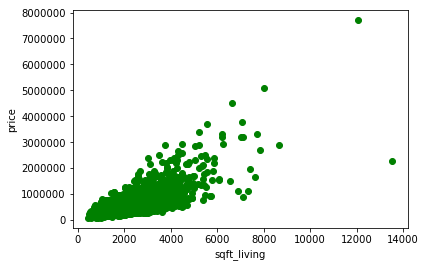

In [78]:
plt.scatter(train_set1.iloc[:,1], train_set1.iloc[:,2:3], c="g")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show

### 2-1

In [79]:
x7.shape, y7.shape

((3458, 2), (3458, 1))

In [80]:
initial_w = np.zeros((x7.shape[1],1))
cost_function(initial_w, x7, y7)

26981829164718.53

In [81]:
iterations = 1500
alpha = 0.00000001

In [82]:
def cost_function1(x, y, w):  
    inner = np.power(((x * w.T) - y), 2)
    return np.sum(inner) / (2 * len(x))
w = np.matrix(np.array([0,0]))  
def descendGradient1(x, y, w, alpha, iterations):  
    temp = np.matrix(np.zeros(w.shape))
    parameters = int(w.ravel().shape[1])
    cost = np.zeros(iterations)
    for i in range(iterations):
        error = (x * w.T) - y

        for j in range(parameters):
            term = np.multiply(error, x[:,j])
            temp[0,j] = w[0,j] - ((alpha / len(x)) * np.sum(term))

        w = temp
        cost[i] = cost_function1(x, y, w)
        #costs.append(costs[i])
    return w, cost

In [83]:
w7, cost7 = descendGradient1(x7, y7, w, alpha, iterations)

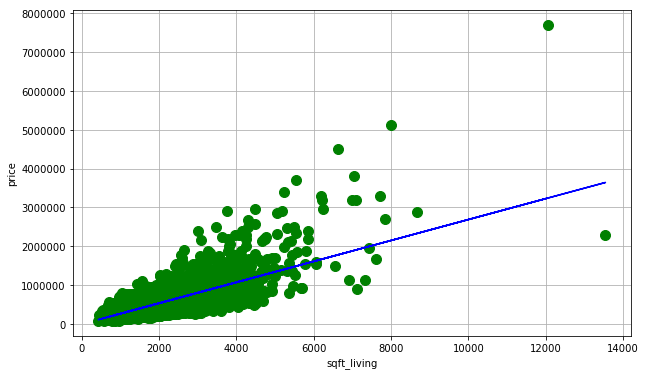

In [84]:
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
xmat = np.ones((30,1))
xmat = np.insert(xmat,xmat.shape[1],xvals.T,axis=1)
xmat = x_squared
#f = poly1d(h(matrix_w1,xmat))
plt.plot(train_set1.iloc[:,1],y7,'go',markersize=10,label='Training Data')
#x_squared = (x_squared - mean)/std
#_=plt.plot(xvals,np.dot(x_squared, matrix_w1),'b-')
_=plt.plot(train_set1.iloc[:,1],h(w7.T, x7),'b-')
#_=plt.plot(df.iloc[:,1],np.poly1d(w1_flat)(df.iloc[:,1]),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

In [85]:
print 'RMSE of training set: %f' %np.sqrt(cost_function1(x7, y7, w7))

RMSE of training set: 195800.374963


In [86]:
print 'RMSE of validation set: %f' %np.sqrt(cost_function1(x8, y8, w7))

RMSE of validation set: 172395.487193


In [87]:
def mse(x, y, w):
    total_cost = 0
    for i in range (len(y)):
        total_cost += np.power(((x[i] * w.T) - y[i]),2)
    return total_cost / len(x)

In [88]:
#y_hat = h(w7.T, test_set.iloc[:,0:2])
print 'RMSE of test set: %f' %np.sqrt(mse(x8_test, y8_test, w7))

RMSE of test set: 266027.937960


### 2-2

In [89]:
df2 = pd.read_csv('ex2data2.csv')

In [90]:
train_set2, test_set2 = train_test_split(df2, test_size = 0.2, random_state=1)

In [91]:
train_set2, validation_set2 = train_test_split(train_set2, test_size=0.2, random_state=1)

In [92]:
origin_train_set2 = train_set2

In [93]:
train_set2.iloc[:, 0] = (train_set2.iloc[:,0] - train_set2.iloc[:,0].mean()) / (train_set2.iloc[:,0].std())
validation_set2.iloc[:, 0] = (validation_set2.iloc[:,0] - validation_set2.iloc[:,0].mean()) / (validation_set2.iloc[:,0].std())
test_set2.iloc[:, 0] = (test_set2.iloc[:,0] - test_set2.iloc[:,0].mean()) / (test_set2.iloc[:,0].std())

/Users/trininh/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [94]:
train_set2.insert(0, 'Ones', 1)
validation_set2.insert(0, 'Ones', 1)
test_set2.insert(0, 'Ones', 1)

In [95]:
x9 = np.matrix(train_set2.iloc[:, 0:2])
y9 = np.matrix(train_set2.iloc[:, 2:3].values)
y9_val = np.matrix(validation_set2.iloc[:, 2:3].values)
y9_test = np.matrix(test_set2.iloc[:, 2:3].values)

In [96]:
new_x9 = genPolyFeatures(train_set2.iloc[:, 0:2].values, 1)
x9_val = genPolyFeatures(validation_set2.iloc[:, 0:2].values, 1)
x9_test = genPolyFeatures(test_set2.iloc[:, 0:2].values, 1)

In [97]:
new_x9.shape

(3458, 3)

In [98]:
x9_squared = np.matrix(new_x9)
x9_squared_val = np.matrix(x9_val)
x9_squared_test = np.matrix(x9_test)

In [100]:
init_w = np.zeros((x9_squared.shape[1], 1))
init_w.shape

(3, 1)

In [101]:
init_w1 = np.matrix(np.zeros((x9_squared.shape[1], 1)).T)
iterations = 1500
alpha = 0.0001
w9, cost9 = descendGradient1(x9_squared, y9, init_w1, alpha, iterations)

In [102]:
w9_flat = w9.flatten()
w9_flat.shape

(1, 3)

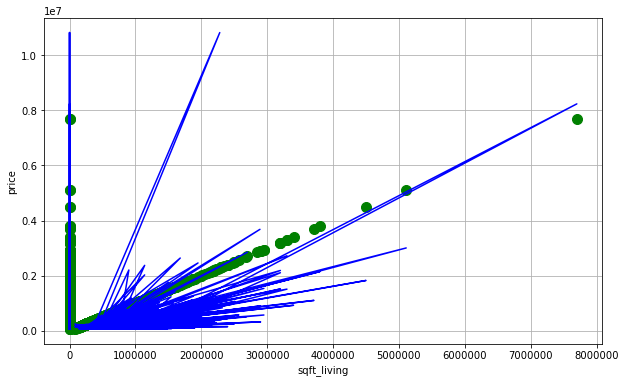

In [106]:
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
#f = poly1d(h(matrix_w1,xmat))
plt.plot(origin_train_set2,y9,'go',markersize=10,label='Training Data')
#x_squared = (x_squared - mean)/std
#_=plt.plot(xvals,np.dot(x_squared, matrix_w1),'b-')
_=plt.plot(origin_train_set2.values,h(w9.T,x9_squared),'b-')
#_=plt.plot(df.iloc[:,1],np.poly1d(w1_flat)(df.iloc[:,1]),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

In [107]:
print 'RMSE of training set: %f' %np.sqrt(mse(x9_squared, y9, w9))

RMSE of training set: 524363.513173


In [108]:
print 'RMSE of validation set: %f' %np.sqrt(mse(x9_val, y9_val, w9))

RMSE of validation set: 473996.112056


In [109]:
print 'RMSE of test set: %f' %np.sqrt(mse(x9_test, y9_test, w9))

RMSE of test set: 492769.434804


### 2-3
DataFrames: train_set2, validation_set2 and test_set2 <br />
function mse(x, y, w)

In [110]:
x10_4th = np.matrix(genPolyFeatures(train_set2.iloc[:, 0:2].values, 3))
x10_val_4th = np.matrix(genPolyFeatures(validation_set2.iloc[:, 0:2].values, 3))
x10_test_4th = np.matrix(genPolyFeatures(test_set2.iloc[:, 0:2].values, 3))

In [111]:
init_w2 = np.matrix(np.zeros((x10_4th.shape[1], 1)).T)
iterations = 3000
alpha = 0.00000001
w10, cost10 = descendGradient1(x10_4th, y9, init_w2, alpha, iterations)

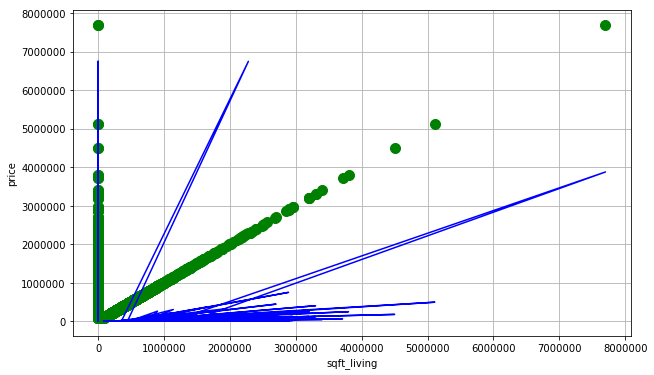

In [116]:
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
#f = poly1d(h(matrix_w1,xmat))
plt.plot(origin_train_set2,y9,'go',markersize=10,label='Training Data')
#x_squared = (x_squared - mean)/std
#_=plt.plot(xvals,np.dot(x_squared, matrix_w1),'b-')
_=plt.plot(origin_train_set2.values,h(w10.T,x9_squared),'b-')
#_=plt.plot(df.iloc[:,1],np.poly1d(w1_flat)(df.iloc[:,1]),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

In [117]:
print 'Optimized weights: {}'.format(w10)
#print w10

Optimized weights: [[  16.41469641    7.92673364   31.61196366   93.7513775   374.34647608]]


In [118]:
print 'RMSE of training data: %f' %np.sqrt(mse(x10_4th, y9, w10))

RMSE of training data: 669996.415586


In [119]:
print 'RMSE of validation data: %f' %np.sqrt(mse(x10_val_4th, y9_val, w10))

RMSE of validation data: 629027.123263


In [120]:
print 'RMSE of test data: %f' %np.sqrt(mse(x10_test_4th, y9_test, w10))

RMSE of test data: 655870.120341


### 2-4
DataFrames: train_set2, validation_set2 and test_set2 <br />
function mse(x, y, w)

In [122]:
x10_16th = np.matrix(genPolyFeatures(train_set2.iloc[:, 0:2].values, 15))
x10_val_16th = np.matrix(genPolyFeatures(validation_set2.iloc[:, 0:2].values, 15))
x10_test_16th = np.matrix(genPolyFeatures(test_set2.iloc[:, 0:2].values, 15))

In [128]:
init_w2 = np.matrix(np.zeros((x10_16th.shape[1], 1)).T)
iterations = 3000
alpha = 0.0000000000000000000000000000001
w11, cost11 = descendGradient1(x10_16th, y9, init_w2, alpha, iterations)

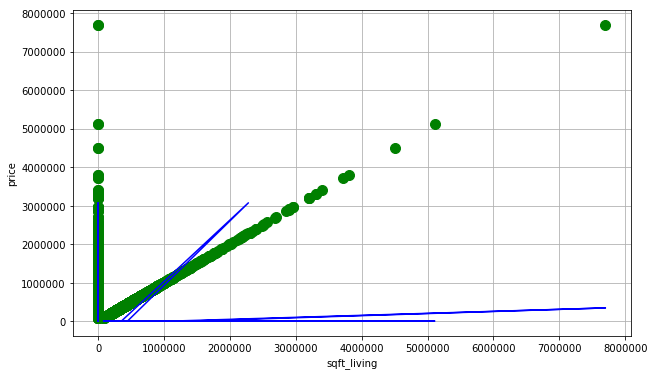

In [129]:
plt.figure(figsize=(10,6))
xvals = np.linspace(df.x.min(), df.x.max(), 30)
#f = poly1d(h(matrix_w1,xmat))
plt.plot(origin_train_set2,y9,'go',markersize=10,label='Training Data')
#x_squared = (x_squared - mean)/std
#_=plt.plot(xvals,np.dot(x_squared, matrix_w1),'b-')
_=plt.plot(origin_train_set2.values,h(w11.T,x10_16th),'b-')
#_=plt.plot(df.iloc[:,1],np.poly1d(w1_flat)(df.iloc[:,1]),'b-')
plt.grid(True) #Always plot.grid true!
plt.ylabel('price')
plt.xlabel('sqft_living')
plt.show()

In [130]:
print 'Optimized weights: {}'.format(w11)

Optimized weights: [[  1.65128368e-22   8.59196687e-23   3.73772412e-22   1.49422531e-21
    9.45141348e-21   7.07814743e-20   5.91590348e-19   5.21007399e-18
    4.69484638e-17   4.25011531e-16   3.81573344e-15   3.35718326e-14
    2.85160922e-13   2.28132629e-12   1.63056213e-11   8.83668388e-11
    2.40317760e-11]]


In [131]:
print 'RMSE of training data: %f' %np.sqrt(mse(x10_16th, y9, w11))
print 'RMSE of validation set: %f' %np.sqrt(mse(x10_val_16th, y9_val, w11))
print 'RMSE of test data: %f' %np.sqrt(mse(x10_test_16th, y9_test, w11))

RMSE of training data: 682168.095792
RMSE of validation set: 632689.562523
RMSE of test data: 665784.718133


### 2-5
DataFrames: train_set2, validation_set2 and test_set2 <br />
function mse(x, y, w) <br />
- train set: x10_16th
- validation set: x10_val_16th
- test set: x10_test_16th
- penalty=[0.001, 0.1, 1, 10]

In [133]:
coefs1=[]
penalty=[-1, 0.00000035, 0.000001, 0.001, 0.1, 1, 1.5, 2, 2.5, 10]
for l in penalty:
    #init_w3 = np.zeros((x10_16th.shape[1],1))
    matrix_w5 = np.matrix(gradient_descent_reg(init_w2.T,x10_16th,y9,l))
    coefs1.append(matrix_w5)

In [136]:
print 'RMSE of training data: %f' %np.sqrt(mse(x10_16th, y9, coefs1[1].T))
print 'RMSE of validation set: %f' %np.sqrt(mse(x10_val_16th, y9_val, coefs1[1].T))
print 'RMSE of test data: %f' %np.sqrt(mse(x10_test_16th, y9_test, coefs1[1].T))

RMSE of training data: 144068298415626382197751679301976064.000000
RMSE of validation set: 59882506502291504573865525248.000000
RMSE of test data: 16790006111683910516278443376640.000000


### 2-6
DataFrames: train_set2, validation_set2 and test_set2 <br />
function mse(x, y, w) <br />
- train set: x10_16th
- validation set: x10_val_16th
- test set: x10_test_16th
- penalty=[0.001, 0.1, 1, 10]

In [148]:
df4 = pd.read_csv('ex2data2.csv')

In [149]:
def split_train_test(X, test_ratio):
    np.random.seed(1)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices]

In [150]:
train_set4, test_set4 = split_train_test(df4, 0.2)
train_set4, val_set4 = split_train_test(train_set4, 0.2)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_train = scaler.fit_transform(train_set4.iloc[:, 0:1])
x14_train_norm = pd.DataFrame(norm_train, columns=['Sqft_living'])
norm_val = scaler.fit_transform(val_set4.iloc[:, 0:1])
x14_val_norm = pd.DataFrame(norm_val, columns=['Sqft_living'])
norm_test = scaler.fit_transform(test_set4.iloc[:, 0:1])
x14_test_norm = pd.DataFrame(norm_test, columns=['Sqft_living'])

In [156]:
x14_train_norm

Sqft_living
0       -1.479852
1        2.335908
2        1.625049
3        0.542419
4       -0.856829
5        0.409644
6       -0.846615
7        0.532206
8        0.430071
9       -0.019323
10       0.726262
11      -0.756737
12       0.481138
13       0.430071
14      -0.877256
15      -0.683200
16      -0.672986
17      -0.611705
18      -1.387930
19       0.348363
20       1.226723
21      -0.335941
22       0.521992
23      -0.376795
24      -0.815975
25      -0.856829
26       0.205374
27       1.420780
28       0.399430
29      -0.417649
...           ...
3430    -0.244019
3431    -0.897683
3432    -0.693413
3433     1.093948
3434    -1.122380
3435     0.225801
3436    -0.203166
3437    -0.856829
3438    -0.213379
3439    -0.274660
3440     0.736476
3441    -0.356368
3442     0.634341
3443     0.276869
3444    -0.049963
3445     0.052172
3446     0.859038
3447     1.533128
3448    -0.029536
3449     0.307509
3450     0.838611
3451     0.848824
3452    -0.039750
3453     0.940745
3454    -0.815975
3455    -0.121458
3456    -0.591278
3457    -0.172525
3458     0.256442
3459    -0.111244

[3460 rows x 1 columns]

In [155]:
y12_train = train_set4.iloc[:, 1]
y12_val = val_set4.iloc[:, 1]
y12_test = test_set4.iloc[:, 1]

In [161]:
x14_train_norm.insert(0, 'Ones', 1)
x14_16th_train= genPolyFeatures(x14_train_norm.iloc[:,0:2].values,15)

Automatically created module for IPython interactive environment


/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.02755957313e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.0294371366e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.33155844443e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditi

/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.8109095193e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 7.00240566995e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.01601538965e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditi

/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.49159845444e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.27087363322e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.78326798975e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/Users/trininh/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-condit

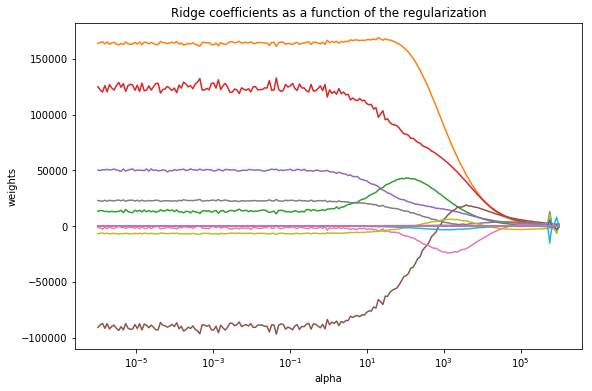

In [162]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

r = Ridge()

#X, y, w = make_regression(n_samples=10, n_features=10, coef=True,random_state=1, bias=3.5)

coefs5 = []
errors5 = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    r.set_params(alpha=a)
    r.fit(x14_16th_train, y12_train)
    coefs.append(r.coef_)
    errors.append(mean_squared_error(r.predict(x14_16th_train), y12_train))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.show()

In [127]:

print 'RMSE of training data: %f' %np.sqrt(mse(x1_16th, y9, coefs2[1]))
print 'RMSE of validation set: %f' %np.sqrt(mse(x10_val_16th, y9_val, coefs2[1]))
print 'RMSE of test data: %f' %np.sqrt(mse(x10_test_16th, y9_test, coefs2[1]))

RMSE of training data: 247282.847174
RMSE of validation set: 245546.388050
RMSE of test data: 266982.447057


### 2-7
DataFrames: train_set2, validation_set2 and test_set2 <br />
function mse(x, y, w) <br />
- train set: x10_16th
- validation set: x10_val_16th
- test set: x10_test_16th
- penalty=[0.001, 0.1, 1, 10]

In [134]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

r = Ridge()

#X, y, w = make_regression(n_samples=10, n_features=10, coef=True,random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    r.set_params(alpha=a)
    r.fit(x12_train_norm, y12_train)
    coefs.append(r.coef_)
    errors.append(mean_squared_error(r.predict(x12_train_norm), y12_train))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.show()

In [133]:
print 'RMSE of training data: %f' %np.sqrt(mse(x10_16th, y9, coefs3[10]))
print 'RMSE of validation set: %f' %np.sqrt(mse(x10_val_16th, y9_val, coefs3[10]))
print 'RMSE of test data: %f' %np.sqrt(mse(x10_test_16th, y9_test, coefs3[10]))

RMSE of training data: 684224.821310
RMSE of validation set: 632689.565755
RMSE of test data: 665786.694837


### 3-1

In [163]:
df3 = pd.read_csv('ex2data3.csv', index_col=0)

In [164]:
def split_train_test(X, test_ratio):
    np.random.seed(1)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X.iloc[train_indices], X.iloc[test_indices]

In [165]:
train_set3, test_set3 = split_train_test(df3, 0.2)

In [168]:
train_set3, val_set3 = split_train_test(train_set3, 0.2)

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_train = scaler.fit_transform(train_set3.iloc[:, 0:8])
x12_train_norm = pd.DataFrame(norm_train, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population','AveOccup','Latitude', 'Longitude' ])
norm_val = scaler.fit_transform(val_set3.iloc[:, 0:8])
x12_val_norm = pd.DataFrame(norm_val, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population','AveOccup','Latitude', 'Longitude' ])
norm_test = scaler.fit_transform(test_set3.iloc[:, 0:8])
x12_test_norm = pd.DataFrame(norm_test, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population','AveOccup','Latitude', 'Longitude' ])

In [170]:
y12_train = train_set3.iloc[:, 8]
y12_val = val_set3.iloc[:, 8]
y12_test = test_set3.iloc[:, 8]

Automatically created module for IPython interactive environment


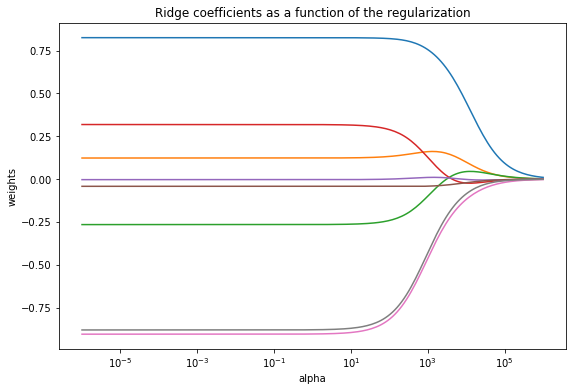

In [171]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

r = Ridge()

#X, y, w = make_regression(n_samples=10, n_features=10, coef=True,random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    r.set_params(alpha=a)
    r.fit(x12_train_norm, y12_train)
    coefs.append(r.coef_)
    errors.append(mean_squared_error(r.predict(x12_train_norm), y12_train))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')


plt.show()

In [172]:
r.set_params(alpha=10)
r.fit(x12_val_norm, y12_val)
print 'Optimized weights:'
print r.coef_
print 'RMSE train set: %f' %np.sqrt(mean_squared_error(r.predict(x12_train_norm), y12_train))
print 'RMSE validation set: %f' %np.sqrt(mean_squared_error(r.predict(x12_val_norm), y12_val))
print 'RMSE test set: %f' %np.sqrt(mean_squared_error(r.predict(x12_test_norm), y12_test))

Optimized weights:
[ 0.85382285  0.11984034 -0.29811102  0.30509361 -0.00737609 -0.043086
 -0.88733431 -0.85652349]
RMSE train set: 0.727765
RMSE validation set: 0.710077
RMSE test set: 0.721643


### 3-2

Automatically created module for IPython interactive environment


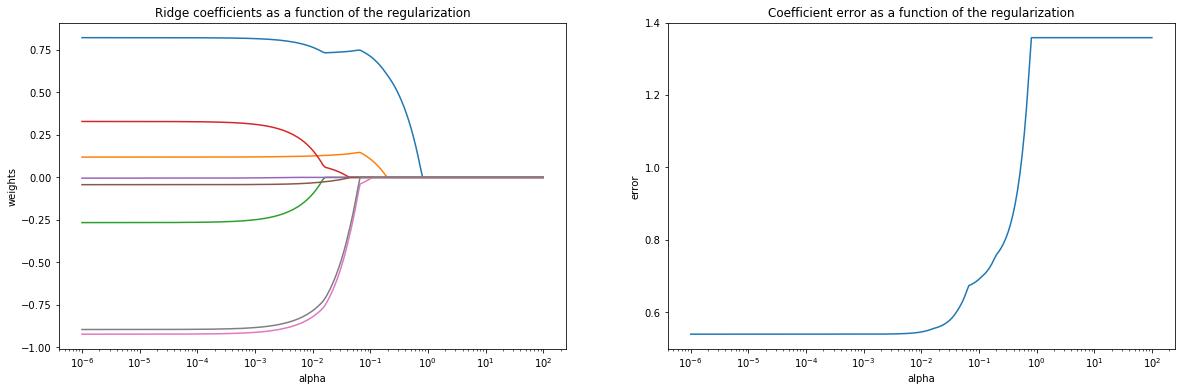

In [276]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

clf = Lasso()

#X, y, w = make_regression(n_samples=10, n_features=10, coef=True,random_state=1, bias=3.5)

coefs = []
errors = []

alphas = np.logspace(-6, 2, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x12_train_norm, y12_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.predict(x12_train_norm), y12_train))

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

In [277]:
clf.set_params(alpha=10**(-4))
clf.fit(x12_val_norm, y12_val)
print 'Optimized weights:'
print clf.coef_
print 'RMSE train set: %f' %np.sqrt(mean_squared_error(clf.predict(x12_train_norm), y12_train))
print 'RMSE validation set: %f' %np.sqrt(mean_squared_error(clf.predict(x12_val_norm), y12_val))
print 'RMSE test set: %f' %np.sqrt(mean_squared_error(clf.predict(x12_test_norm), y12_test))

Optimized weights:
[ 0.83151622  0.1531012  -0.21985478  0.21958996  0.03006201 -0.17249427
 -0.82220696 -0.79020261]
RMSE train set: 0.750461
RMSE validation set: 0.669909
RMSE test set: 0.707832


### 3-3

In [463]:
import tensorflow as tf

x12_train_norm.insert(0, 'Ones', 1)
x12_val_norm.insert(0, 'Ones', 1)
x12_test_norm.insert(0, 'Ones', 1)

In [464]:
X = tf.constant(x12_train_norm.values, dtype=tf.float32, name='X')
X_val = tf.constant(x12_val_norm.values, dtype=tf.float32, name='X_val')
X_test = tf.constant(x12_test_norm.values, dtype=tf.float32, name='X_test')

In [467]:
y = tf.constant(y12_train.values.reshape(-1,1), dtype=tf.float32, name='y')
y_val = tf.constant(y12_val.values.reshape(-1,1), dtype=tf.float32, name='y_val')
y_test = tf.constant(y12_test.values.reshape(-1,1), dtype=tf.float32, name='y_test')

In [468]:
m, n = x12_train_norm.shape

In [493]:
theta = tf.Variable(tf.random_uniform([n,1],-1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name='Predictions')
error = y_pred - y
rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name='rmse')
scale = np.array([0.001,0.01,1, 10])
learning_rate = 0.01
base_loss = tf.reduce_mean(tf.square(error), name='loss')
reg_loss = tf.reduce_sum(tf.square(theta))
loss = tf.add(base_loss,scale[3]/m * reg_loss)
gradients = 2/m * tf.add(tf.matmul(tf.transpose(X), error), scale[3] * theta)
training_op = tf.assign(theta, theta - learning_rate * gradients)

In [494]:
iterations = 1500
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [495]:

for _ in range(iterations):
    sess.run(gradients)
    sess.run(training_op)
#     sess.run(y_pred)
#     sess.run(error)
#     sess.run(theta)

In [508]:
print 'RMSE of training set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error)), name='rmse'))

RMSE of training set: 2.186197


In [509]:
theta = sess.run(theta)

In [510]:
theta

array([[ 0.51753187],
       [ 0.18181562],
       [-0.81341219],
       [ 0.71148157],
       [-0.97749758],
       [ 0.29585624],
       [-0.28493333],
       [-0.314569  ],
       [-0.77385688]], dtype=float32)

In [511]:
y_pred_val = tf.matmul(X_val, theta, name='Predictions')
error1 = y_pred_val - y_val
print 'RMSE of validation set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error1)), name='rmse'))

RMSE of validation set: 2.151991


In [512]:
y_pred_test = tf.matmul(X_test, theta, name='Predictions')
error2 = y_pred_test - y_test
print 'RMSE of test set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error2)), name='rmse'))

RMSE of test set: 2.136398


In [513]:
sess.close()

### 3-4

In [520]:
theta = tf.Variable(tf.random_uniform([n,1],-1.0, 1.0), name="theta")
y_pred = tf.matmul(X, theta, name='Predictions')
error3 = y_pred - y
rmse = tf.sqrt(tf.reduce_mean(tf.square(error)), name='rmse')
scale = np.array([0.0001,0.01,1, 10])
learning_rate = 0.01
base_loss = tf.reduce_mean(tf.square(error), name='loss')
reg_loss = tf.reduce_sum(tf.abs(theta))
loss = tf.add(base_loss,scale[0]/m * reg_loss)
gradients = 2/m * tf.add(tf.matmul(tf.transpose(X), error3), scale[0] * theta)
training_op = tf.assign(theta, theta - learning_rate * gradients)

In [521]:
iterations = 1500
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [522]:
for _ in range(iterations):
    sess.run(gradients)
    sess.run(training_op)

In [523]:
print 'RMSE of training set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error3)), name='rmse'))

RMSE of training set: 2.652562


In [524]:
theta = sess.run(theta)
theta

array([[ 0.34745693],
       [-0.12198281],
       [-0.48904586],
       [-0.94119954],
       [ 0.91001439],
       [ 0.35405111],
       [ 0.80015516],
       [ 0.33242178],
       [ 0.7685771 ]], dtype=float32)

In [525]:
y_pred_val = tf.matmul(X_val, theta, name='Predictions')
error4 = y_pred_val - y_val
print 'RMSE of validation set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error4)), name='rmse'))

RMSE of validation set: 2.761567


In [527]:
y_pred_test = tf.matmul(X_test, theta, name='Predictions')
error5 = y_pred_test - y_test
print 'RMSE of test set: %f' %sess.run(tf.sqrt(tf.reduce_mean(tf.square(error5)), name='rmse'))

RMSE of test set: 2.783694
